<a href="https://colab.research.google.com/github/het249/Photo-to-Sketch/blob/main/Photo_to_Sketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
!pip install kaggle --upgrade

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"het249","key":"1fdf3050165b3f840ec193e578e683c9"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download arbazkhan971/cuhk-face-sketch-database-cufs

100% 113M/113M [00:00<00:00, 102MB/s]  
100% 113M/113M [00:01<00:00, 117MB/s]


In [ ]:
! mkdir train

In [ ]:
! unzip cuhk-face-sketch-database-cufs.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/cropped_sketch/00726.jpg  
  inflating: train/cropped_sketch/00727.jpg  
  inflating: train/cropped_sketch/00728.jpg  
  inflating: train/cropped_sketch/00729.jpg  
  inflating: train/cropped_sketch/00730.jpg  
  inflating: train/cropped_sketch/00731.jpg  
  inflating: train/cropped_sketch/00732.jpg  
  inflating: train/cropped_sketch/00733.jpg  
  inflating: train/cropped_sketch/00734.jpg  
  inflating: train/cropped_sketch/00735.jpg  
  inflating: train/cropped_sketch/00736.jpg  
  inflating: train/cropped_sketch/00737.jpg  
  inflating: train/cropped_sketch/00738.jpg  
  inflating: train/cropped_sketch/00739.jpg  
  inflating: train/cropped_sketch/00740.jpg  
  inflating: train/cropped_sketch/00741.jpg  
  inflating: train/cropped_sketch/00742.jpg  
  inflating: train/cropped_sketch/00743.jpg  
  inflating: train/cropped_sketch/00744.jpg  
  inflating: train/cropped_sketch/00745.jpg  
  inflating: train/cropped_sk

In [ ]:
import numpy as np
import keras 
from keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Dropout, Input
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm 
import os
import re

In [ ]:
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)

In [ ]:
SIZE = 256

image_path = '/content/train/photos'
img_array = []

sketch_path = '/content/train/sketches'
sketch_array = []

image_file = sorted_alphanumeric(os.listdir(image_path))
sketch_file = sorted_alphanumeric(os.listdir(sketch_path))


for i in tqdm(image_file):
    image = cv2.imread(image_path + '/' + i,1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (SIZE, SIZE))
    image = image.astype('float32') / 255.0
    img_array.append(img_to_array(image))
    img1 = cv2.flip(image,1)
    img_array.append(img_to_array(img1))
    img2 = cv2.flip(image,-1)
    img_array.append(img_to_array(img2))
    img3 = cv2.flip(image,-1)
    img3 = cv2.flip(img3,1)
    img_array.append(img_to_array(img3))
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    img_array.append(img_to_array(img4))
    img5 = cv2.flip(img4,1)
    img_array.append(img_to_array(img5))
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img_array.append(img_to_array(img6))
    img7 = cv2.flip(img6,1)
    img_array.append(img_to_array(img7))


for i in tqdm(sketch_file):
    image = cv2.imread(sketch_path + '/' + i,1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (SIZE, SIZE))
    image = image.astype('float32') / 255.0
    sketch_array.append(img_to_array(image))
    img1 = cv2.flip(image,1)
    sketch_array.append(img_to_array(img1))
    img2 = cv2.flip(image,-1)
    sketch_array.append(img_to_array(img2))
    img3 = cv2.flip(image,-1)
    img3 = cv2.flip(img3,1)
    sketch_array.append(img_to_array(img3))
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    sketch_array.append(img_to_array(img4))
    img5 = cv2.flip(img4,1)
    sketch_array.append(img_to_array(img5))
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    sketch_array.append(img_to_array(img6))
    img7 = cv2.flip(img6,1)
    sketch_array.append(img_to_array(img7))

100%|██████████| 188/188 [00:00<00:00, 379.94it/s]


In [ ]:
def plot_images(image, sketches):
    plt.figure(figsize=(7,7))
    plt.subplot(1,2,1)
    plt.title('Image', color = 'green', fontsize = 20)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.title('Sketches ', color = 'black', fontsize = 20)
    plt.imshow(sketches,cmap='gray')
   
    plt.show()

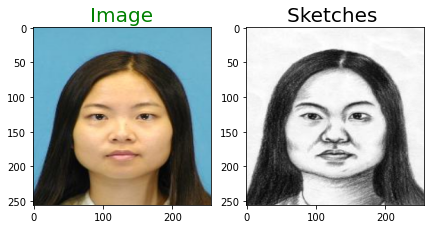

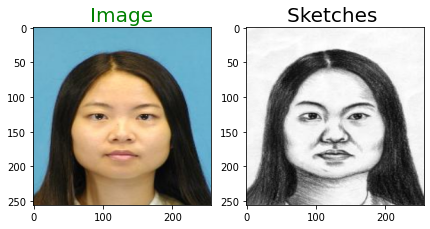

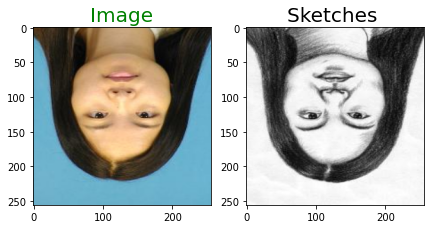

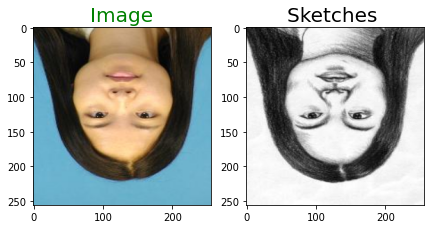

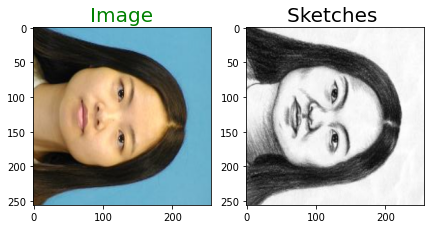

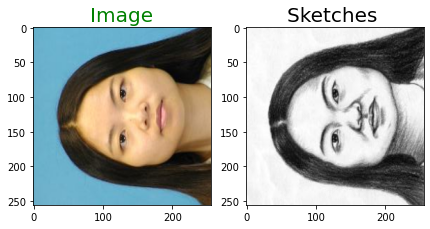

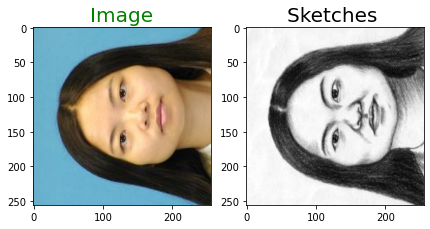

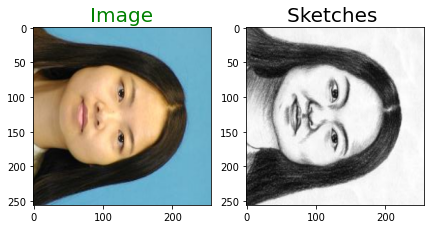

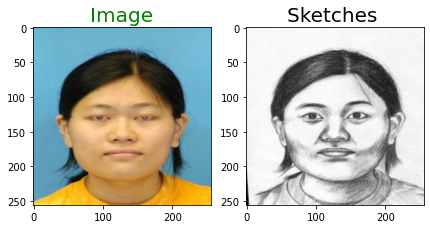

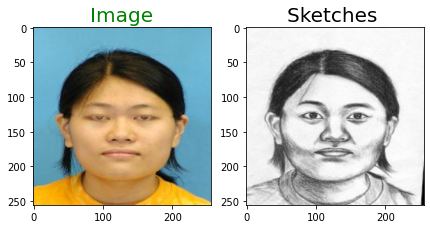

In [ ]:
ls = [i for i in range(0,10)]
for i in ls:
    plot_images(img_array[i],sketch_array[i].reshape(256,256))

In [ ]:
train_sketch_image = sketch_array[:1400]
train_image = img_array[:1400]
test_sketch_image = sketch_array[1400:]
test_image = img_array[1400:]

train_sketch_image = np.reshape(train_sketch_image,(len(train_sketch_image),SIZE,SIZE,1))
train_image = np.reshape(train_image, (len(train_image),SIZE,SIZE,3))
print('Train color image shape:',train_image.shape)
test_sketch_image = np.reshape(test_sketch_image,(len(test_sketch_image),SIZE,SIZE,1))
test_image = np.reshape(test_image, (len(test_image),SIZE,SIZE,3))
print('Test color image shape',test_image.shape)

Train color image shape: (1400, 256, 256, 3)
Test color image shape (104, 256, 256, 3)


##UNet

In [34]:
from keras.layers import MaxPool2D,Conv2D,UpSampling2D,Input,Dropout,Add,BatchNormalization,ReLU,Conv2DTranspose
from keras.models import Sequential

from tensorflow import Tensor
def relu_bn(inputs: Tensor) -> Tensor:
    relu = ReLU()(inputs)
    bn = BatchNormalization()(relu)
    return bn

def down_block(x: Tensor, filters: int) -> Tensor:
    y = Conv2D(kernel_size=3,
               strides= 1,
               filters=filters,
               padding="same")(x)
    y = relu_bn(y)
    y = Dropout(0.1)(y)
    y = Conv2D(kernel_size=3,
               strides=1,
               filters=filters,
               padding="same")(y)
    y = relu_bn(y)
    return y

def up_block(x: Tensor, C0: Tensor, filters: int) -> Tensor:
    y = UpSampling2D(size=(2,2))(x)
    y = Concatenate()([y, C0])
    y = Conv2D(kernel_size=3,
               strides= 1,
               filters=filters,
               padding="same")(y)
    y = ReLU()(y)
    y = Dropout(0.1)(y)
    y = Conv2D(kernel_size=3,
               strides= 1,
               filters=filters,
               padding="same")(y)
    y = ReLU()(y)
    return y

In [35]:
from keras.layers import MaxPooling2D,Concatenate
def model_build_UNet():
    inputs = Input(shape= [256,256,3])
    d1 = down_block(inputs, filters=64)
    d2 = MaxPooling2D(pool_size=(2, 2))(d1) 
    d2 = down_block(d2, filters=128)
    d3 = MaxPooling2D(pool_size=(2, 2))(d2) 
    d3 = down_block(d3, filters=256)
    d4 = MaxPooling2D(pool_size=(2, 2))(d3) 
    d4 = down_block(d4, filters=512)
    d5 = MaxPooling2D(pool_size=(2, 2))(d4) 
    d5 = down_block(d5, filters=1024)
    
    #upsampling
    u1 = up_block(d5,d4,filters=512)
    u2 = up_block(u1,d3,filters=256)
    u3 = up_block(u2,d2,filters=128)
    u4 = up_block(u3,d1,filters=64)
    output = Conv2D(kernel_size=3,strides= 1,filters=1,padding="same")(u4)

    return tf.keras.Model(inputs=inputs, outputs=output)

In [55]:
model_UNet=model_build_UNet()
print(model_UNet.output_shape)
model_UNet.summary()

(None, 256, 256, 1)
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_115 (Conv2D)            (None, 256, 256, 64  1792        ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 re_lu_108 (ReLU)               (None, 256, 256, 64  0           ['conv2d_115[0][0]']             
                                )                                       

In [56]:
model_UNet.compile(optimizer='adam',loss='mse', metrics = ['acc'])

In [57]:
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=2),]
UNet_History = model_UNet.fit(train_image, train_sketch_image, epochs = 25,batch_size = 20,verbose = 1, callbacks=my_callbacks, validation_data=(test_image, test_sketch_image))

Epoch 1/25
70/70 [==============================] - 46s 632ms/step - loss: 41.6943 - acc: 0.0581 - val_loss: 0.3396 - val_acc: 0.0136
Epoch 2/25
70/70 [==============================] - 44s 627ms/step - loss: 0.0347 - acc: 0.0611 - val_loss: 0.1492 - val_acc: 0.2655
Epoch 3/25
70/70 [==============================] - 44s 627ms/step - loss: 0.0305 - acc: 0.0611 - val_loss: 0.0881 - val_acc: 0.2790
Epoch 4/25
70/70 [==============================] - 44s 627ms/step - loss: 0.0287 - acc: 0.0611 - val_loss: 0.0634 - val_acc: 0.2802
Epoch 5/25
70/70 [==============================] - 44s 627ms/step - loss: 0.0272 - acc: 0.0613 - val_loss: 0.0466 - val_acc: 0.2819
Epoch 6/25
70/70 [==============================] - 44s 627ms/step - loss: 0.0264 - acc: 0.0613 - val_loss: 0.0461 - val_acc: 0.2809
Epoch 7/25
70/70 [==============================] - 44s 627ms/step - loss: 0.0261 - acc: 0.0615 - val_loss: 0.0400 - val_acc: 0.2817
Epoch 8/25
70/70 [==============================] - 44s 627ms/step -

In [59]:
prediction_on_test_data = model_UNet.evaluate(test_image, test_sketch_image)
print("Loss: ", prediction_on_test_data[0])
print("Accuracy: ", np.round(prediction_on_test_data[1] * 100,1))

4/4 [==============================] - 13s 1s/step - loss: 0.0352 - acc: 0.2813
Loss:  0.035191766917705536
Accuracy:  28.1


In [62]:
def show_images(real,sketch, predicted):
    plt.figure(figsize = (12,12))
    plt.subplot(1,3,1)
    plt.title("Image",fontsize = 15, color = 'Lime')
    plt.imshow(real)
    plt.subplot(1,3,2)
    plt.title("sketch",fontsize = 15, color = 'Blue')
    plt.imshow(sketch,cmap="gray")
    plt.subplot(1,3,3)
    plt.title("Predicted",fontsize = 15, color = 'gold')
    plt.imshow(predicted,cmap="gray")

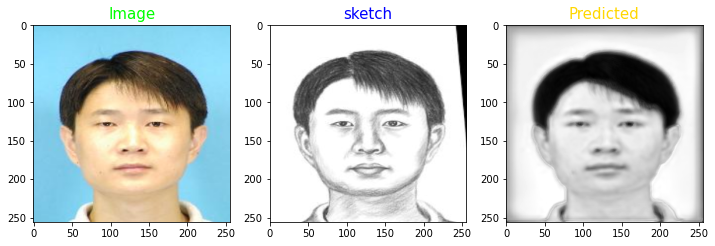

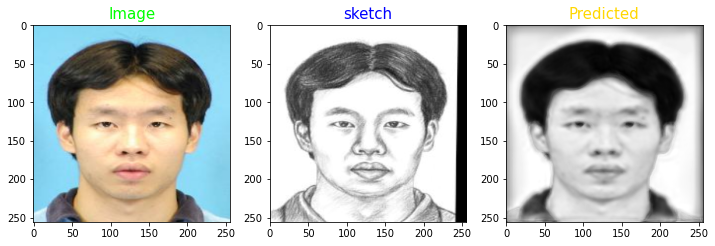

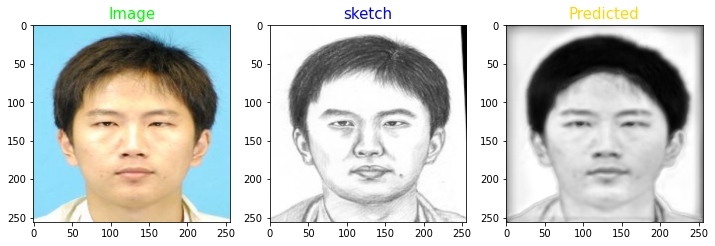

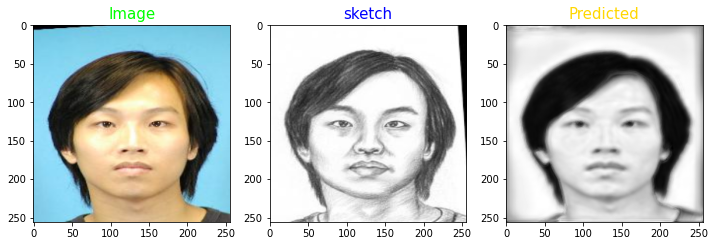

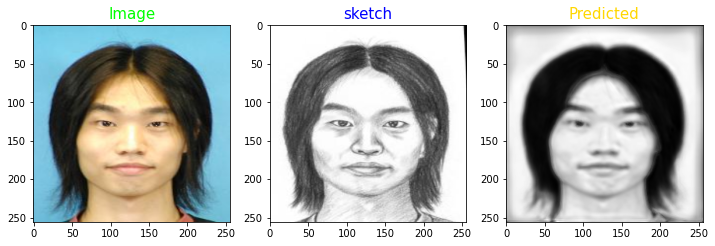

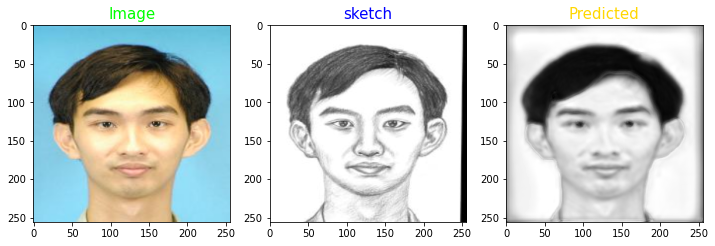

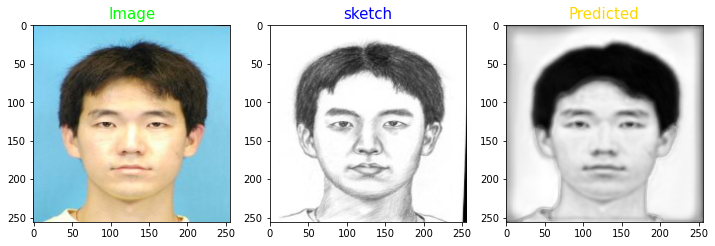

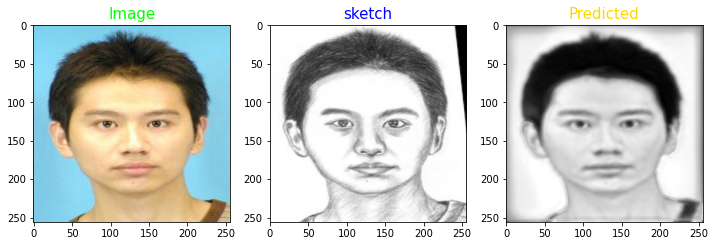

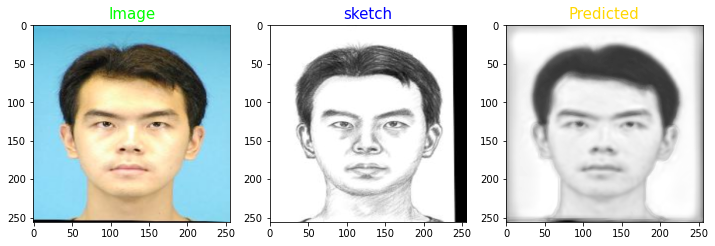

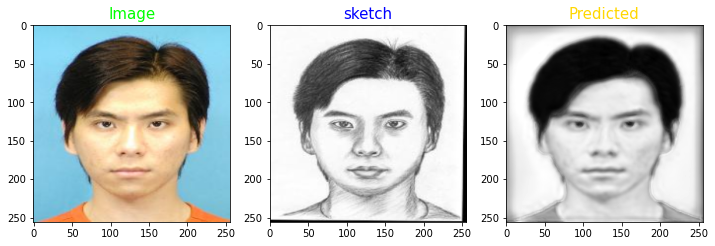

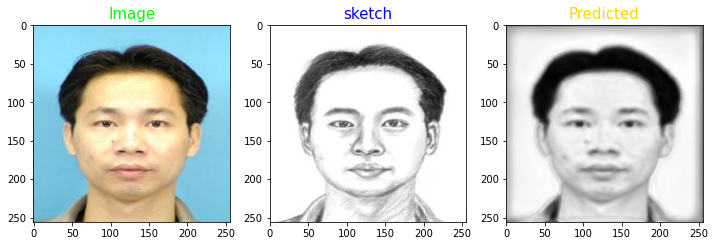

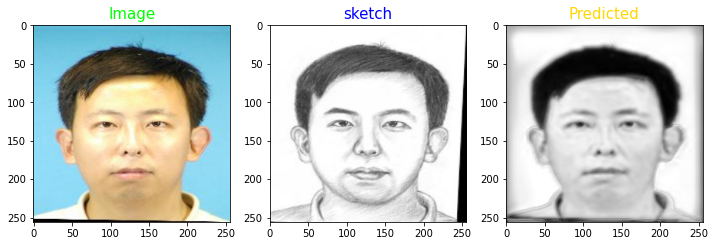

In [107]:
ls = [i for i in range(0,95,8)]
for i in ls:
    predicted =np.clip(model_UNet.predict(test_image[i].reshape(1,SIZE,SIZE,3)),0.0,1.0).reshape(SIZE,SIZE,1)
    show_images(test_image[i],test_sketch_image[i].reshape(SIZE,SIZE),predicted.reshape(SIZE,SIZE))

In [64]:
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=5),]
UNet_History2 = model_UNet.fit(train_image, train_sketch_image, epochs = 19,batch_size = 20,verbose = 1, callbacks=my_callbacks, validation_data=(test_image, test_sketch_image))

Epoch 1/19
70/70 [==============================] - 44s 628ms/step - loss: 0.0249 - acc: 0.0617 - val_loss: 0.0332 - val_acc: 0.2816
Epoch 2/19
70/70 [==============================] - 44s 627ms/step - loss: 0.0247 - acc: 0.0616 - val_loss: 0.0348 - val_acc: 0.2815
Epoch 3/19
70/70 [==============================] - 44s 627ms/step - loss: 0.0248 - acc: 0.0617 - val_loss: 0.0310 - val_acc: 0.2815
Epoch 4/19
70/70 [==============================] - 44s 627ms/step - loss: 0.0242 - acc: 0.0618 - val_loss: 0.0326 - val_acc: 0.2816
Epoch 5/19
70/70 [==============================] - 44s 627ms/step - loss: 0.0245 - acc: 0.0618 - val_loss: 0.0316 - val_acc: 0.2815
Epoch 6/19
70/70 [==============================] - 44s 627ms/step - loss: 0.0240 - acc: 0.0617 - val_loss: 0.0318 - val_acc: 0.2817
Epoch 7/19
70/70 [==============================] - 44s 627ms/step - loss: 0.0244 - acc: 0.0618 - val_loss: 0.0353 - val_acc: 0.2816
Epoch 8/19
70/70 [==============================] - 44s 627ms/step - 

In [94]:
from keras.layers import MaxPooling2D,Concatenate
def model_build_UNet2():
    inputs = Input(shape= [256,256,3])
    d1 = down_block(inputs, filters=16)
    d2 = MaxPooling2D(pool_size=(2, 2))(d1) 
    d2 = down_block(d2, filters=32)
    d3 = MaxPooling2D(pool_size=(2, 2))(d2) 
    d3 = down_block(d3, filters=64)
    d4 = MaxPooling2D(pool_size=(2, 2))(d3) 
    d4 = down_block(d4, filters=128)
    d5 = MaxPooling2D(pool_size=(2, 2))(d4) 
    d5 = down_block(d5, filters=256)
    d6 = MaxPooling2D(pool_size=(2, 2))(d5) 
    d6 = down_block(d6, filters=512)
    
    #upsampling
    u1 = up_block(d6,d5,filters=256)
    u2 = up_block(u1,d4,filters=128)
    u3 = up_block(u2,d3,filters=64)
    u4 = up_block(u3,d2,filters=32)
    u5 = up_block(u4,d1,filters=16)
    output = Conv2D(kernel_size=3,strides= 1,filters=1,padding="same")(u5)

    return tf.keras.Model(inputs=inputs, outputs=output)

In [104]:
model_UNet2=model_build_UNet2()
print(model_UNet2.output_shape)
model_UNet2.summary()

(None, 256, 256, 1)
Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_331 (Conv2D)            (None, 256, 256, 16  448         ['input_20[0][0]']               
                                )                                                                 
                                                                                                  
 re_lu_304 (ReLU)               (None, 256, 256, 16  0           ['conv2d_331[0][0]']             
                                )                                      

In [105]:
model_UNet2.compile(optimizer='adam',loss='mse', metrics = ['acc'])

In [106]:
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=20),]
UNet_History2 = model_UNet2.fit(train_image, train_sketch_image, epochs = 100,batch_size = 50,verbose = 1, callbacks=my_callbacks, validation_data=(test_image, test_sketch_image))

Epoch 1/100
28/28 [==============================] - 11s 333ms/step - loss: 0.5363 - acc: 0.0543 - val_loss: 0.5661 - val_acc: 0.0136
Epoch 2/100
28/28 [==============================] - 9s 319ms/step - loss: 0.0502 - acc: 0.0610 - val_loss: 0.4310 - val_acc: 0.0136
Epoch 3/100
28/28 [==============================] - 9s 318ms/step - loss: 0.0396 - acc: 0.0612 - val_loss: 0.3023 - val_acc: 0.0136
Epoch 4/100
28/28 [==============================] - 9s 319ms/step - loss: 0.0355 - acc: 0.0612 - val_loss: 0.2239 - val_acc: 0.0426
Epoch 5/100
28/28 [==============================] - 9s 318ms/step - loss: 0.0329 - acc: 0.0613 - val_loss: 0.1725 - val_acc: 0.0751
Epoch 6/100
28/28 [==============================] - 9s 317ms/step - loss: 0.0308 - acc: 0.0615 - val_loss: 0.1348 - val_acc: 0.2162
Epoch 7/100
28/28 [==============================] - 9s 319ms/step - loss: 0.0294 - acc: 0.0616 - val_loss: 0.1400 - val_acc: 0.2668
Epoch 8/100
28/28 [==============================] - 9s 318ms/step -

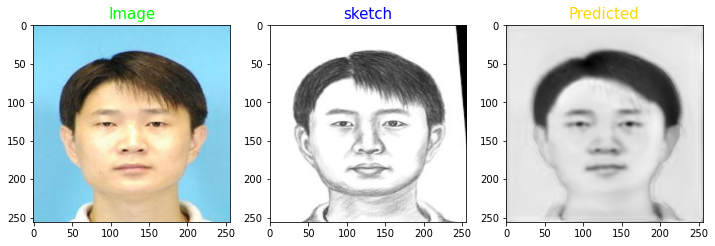

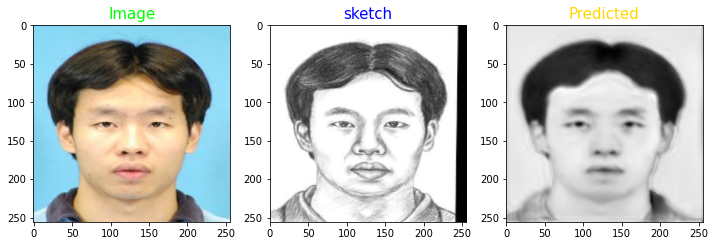

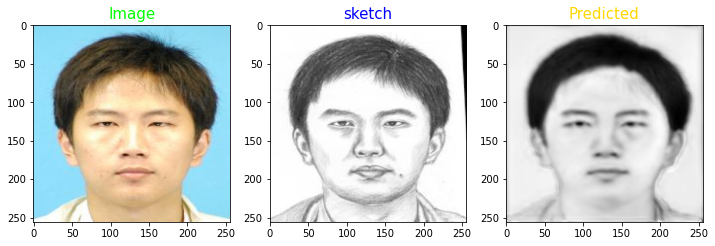

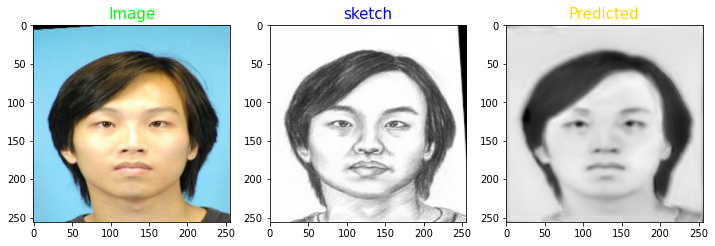

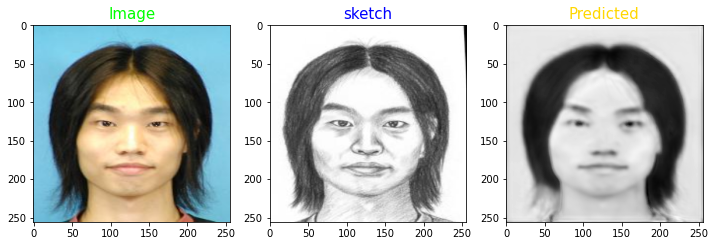

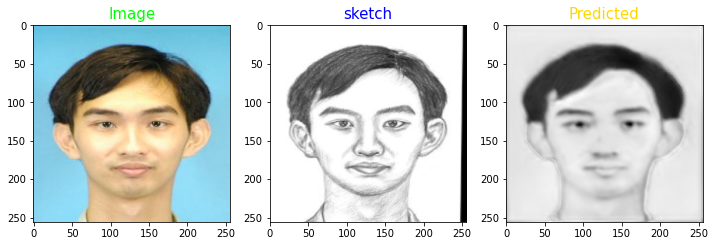

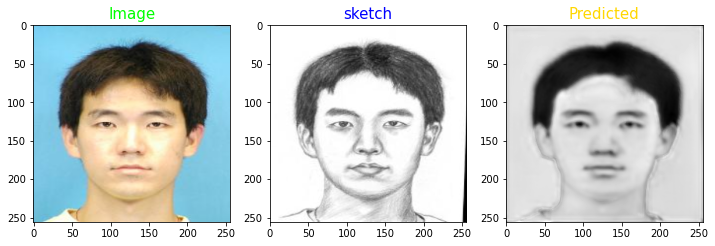

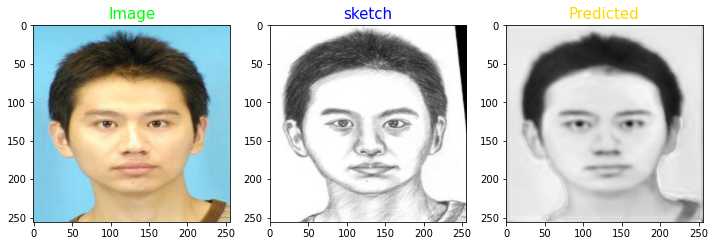

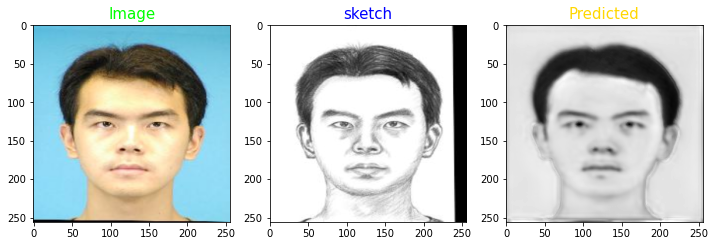

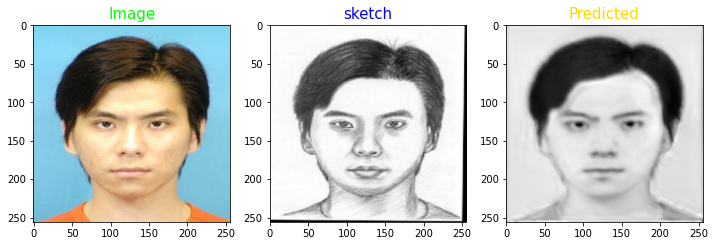

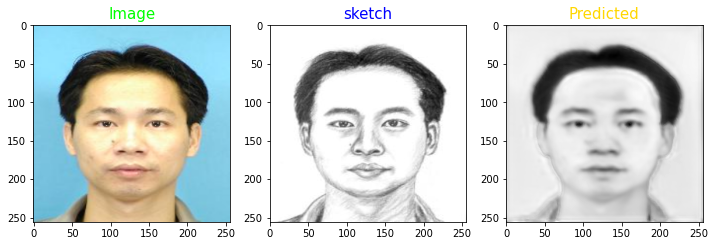

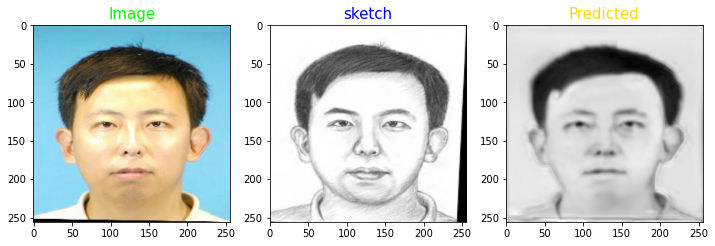

In [108]:
ls = [i for i in range(0,95,8)]
for i in ls:
    predicted =np.clip(model_UNet2.predict(test_image[i].reshape(1,SIZE,SIZE,3)),0.0,1.0).reshape(SIZE,SIZE,1)
    show_images(test_image[i],test_sketch_image[i].reshape(SIZE,SIZE),predicted.reshape(SIZE,SIZE))

In [114]:
#my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=20),]
UNet_History2 = model_UNet2.fit(train_image, train_sketch_image, epochs = 40,batch_size = 50,verbose = 1, validation_data=(test_image, test_sketch_image))

Epoch 1/40
28/28 [==============================] - 9s 321ms/step - loss: 0.0118 - acc: 0.0707 - val_loss: 0.0296 - val_acc: 0.2833
Epoch 2/40
28/28 [==============================] - 9s 320ms/step - loss: 0.0115 - acc: 0.0708 - val_loss: 0.0312 - val_acc: 0.2835
Epoch 3/40
28/28 [==============================] - 9s 319ms/step - loss: 0.0121 - acc: 0.0705 - val_loss: 0.0322 - val_acc: 0.2833
Epoch 4/40
28/28 [==============================] - 9s 319ms/step - loss: 0.0118 - acc: 0.0706 - val_loss: 0.0358 - val_acc: 0.2833
Epoch 5/40
28/28 [==============================] - 9s 320ms/step - loss: 0.0114 - acc: 0.0707 - val_loss: 0.0314 - val_acc: 0.2836
Epoch 6/40
28/28 [==============================] - 9s 318ms/step - loss: 0.0111 - acc: 0.0709 - val_loss: 0.0326 - val_acc: 0.2834
Epoch 7/40
28/28 [==============================] - 9s 319ms/step - loss: 0.0112 - acc: 0.0708 - val_loss: 0.0305 - val_acc: 0.2836
Epoch 8/40
28/28 [==============================] - 9s 319ms/step - loss: 0.

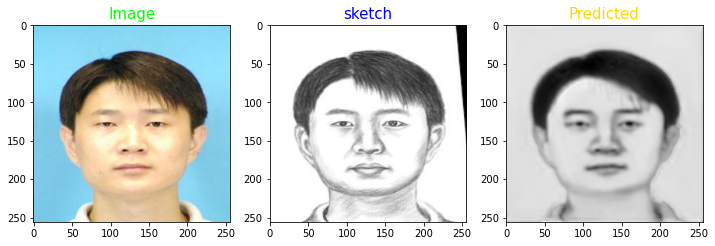

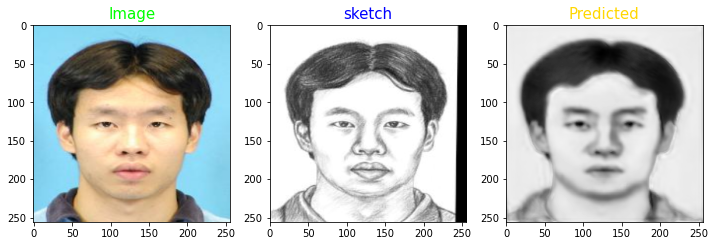

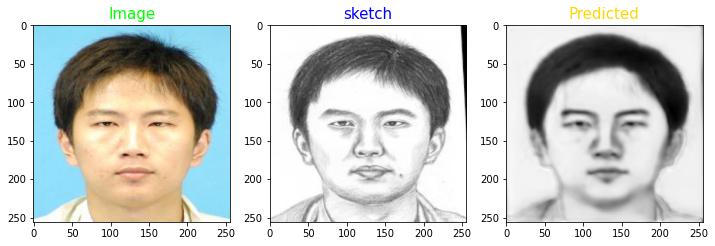

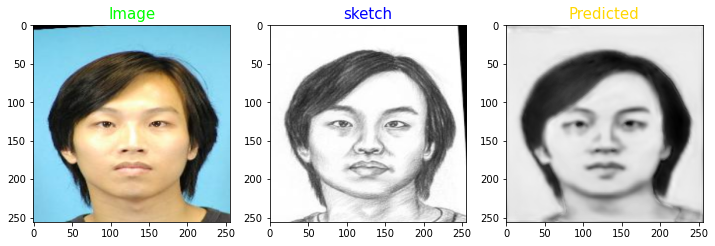

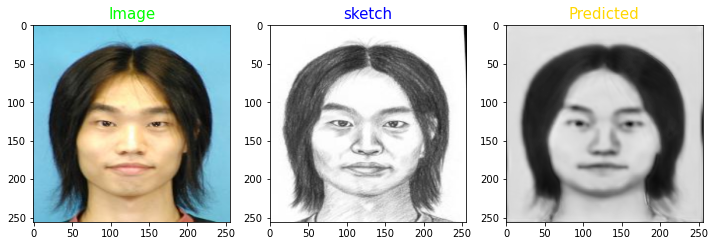

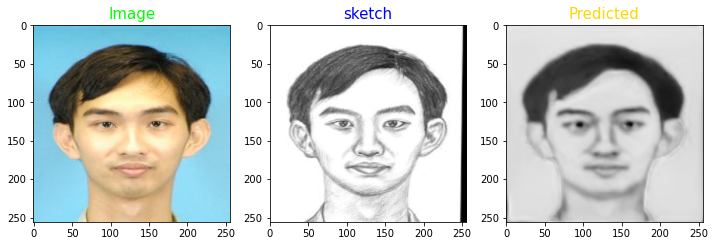

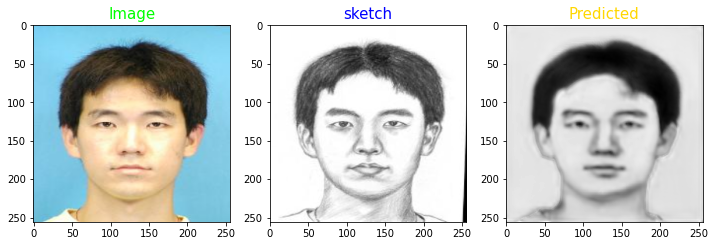

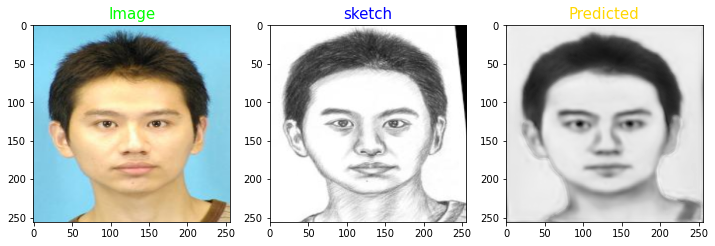

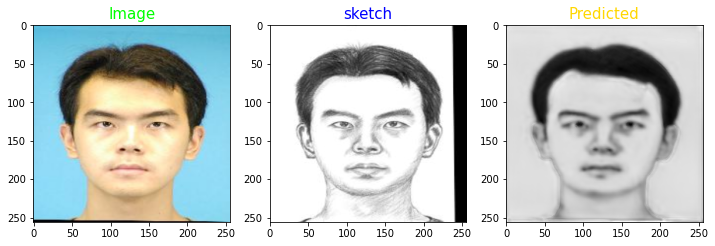

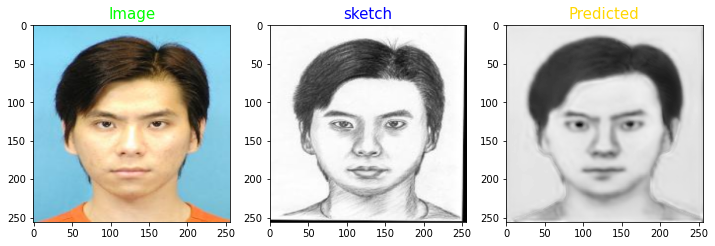

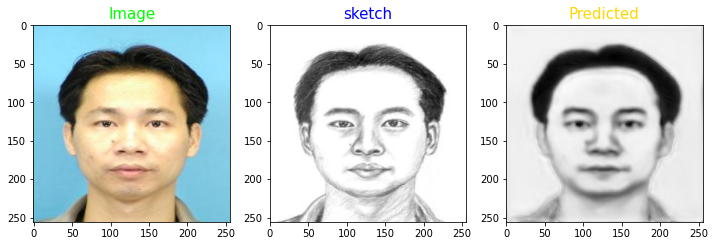

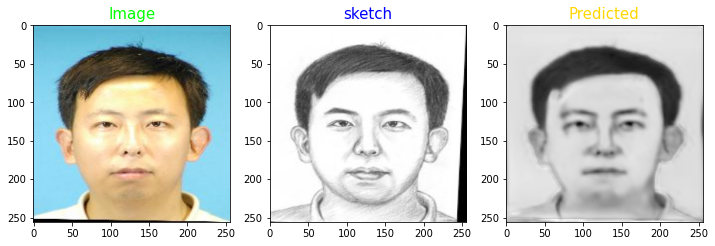

In [115]:
ls = [i for i in range(0,95,8)]
for i in ls:
    predicted =np.clip(model_UNet2.predict(test_image[i].reshape(1,SIZE,SIZE,3)),0.0,1.0).reshape(SIZE,SIZE,1)
    show_images(test_image[i],test_sketch_image[i].reshape(SIZE,SIZE),predicted.reshape(SIZE,SIZE))

##Kaggle model - theblackmamba31/photo-to-sketch-using-autoencoder

In [66]:
def downsample(filters, size, apply_batch_normalization = True):
    downsample = tf.keras.models.Sequential()
    downsample.add(keras.layers.Conv2D(filters = filters, kernel_size = size, strides = 2, use_bias = False, kernel_initializer = 'he_normal'))
    if apply_batch_normalization:
        downsample.add(keras.layers.BatchNormalization())
    downsample.add(keras.layers.LeakyReLU())
    return downsample

def upsample(filters, size, apply_dropout = False):
    upsample = tf.keras.models.Sequential()
    upsample.add(keras.layers.Conv2DTranspose(filters = filters, kernel_size = size, strides = 2, use_bias = False, kernel_initializer = 'he_normal'))
    if apply_dropout:
        upsample.add(tf.keras.layers.Dropout(0.1))
    upsample.add(tf.keras.layers.LeakyReLU()) 
    return upsample

In [69]:
def kaggle_model_build():
    encoder_input = keras.Input(shape = (SIZE, SIZE, 3))
    x = downsample(16, 4, False)(encoder_input)
    x = downsample(32,4)(x)
    x = downsample(64,4,False)(x)
    x = downsample(128,4)(x)
    x = downsample(256,4)(x)
   
    encoder_output = downsample(512,4)(x)
    
    decoder_input = upsample(512,4,True)(encoder_output)
    x = upsample(256,4,False)(decoder_input)
    x = upsample(128,4, True)(x)
    x = upsample(64,4)(x)
    x = upsample(32,4)(x)
    x = upsample(16,4)(x)
    x = tf.keras.layers.Conv2DTranspose(8,(2,2),strides = (1,1), padding = 'valid')(x)
    decoder_output = tf.keras.layers.Conv2DTranspose(1,(2,2),strides = (1,1), padding = 'valid')(x)
    
  
    return tf.keras.Model(encoder_input, decoder_output)

In [111]:
model_Kaggle=kaggle_model_build()
print(model_Kaggle.output_shape)
model_Kaggle.summary()

(None, 256, 256, 1)
Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 sequential_36 (Sequential)  (None, 127, 127, 16)      768       
                                                                 
 sequential_37 (Sequential)  (None, 62, 62, 32)        8320      
                                                                 
 sequential_38 (Sequential)  (None, 30, 30, 64)        32768     
                                                                 
 sequential_39 (Sequential)  (None, 14, 14, 128)       131584    
                                                                 
 sequential_40 (Sequential)  (None, 6, 6, 256)         525312    
                                                                 
 sequential_41 (Sequential)  (None, 2,

In [112]:
model_Kaggle.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error', metrics = ['acc'])

UNet_History2 = model_Kaggle.fit(train_image, train_sketch_image, epochs = 100,batch_size = 50,verbose = 1, validation_data=(test_image, test_sketch_image))

Epoch 1/100
28/28 [==============================] - 5s 117ms/step - loss: 0.3950 - acc: 0.0472 - val_loss: 0.8316 - val_acc: 0.2805
Epoch 2/100
28/28 [==============================] - 3s 106ms/step - loss: 0.1682 - acc: 0.0608 - val_loss: 0.3147 - val_acc: 0.2815
Epoch 3/100
28/28 [==============================] - 3s 106ms/step - loss: 0.1361 - acc: 0.0610 - val_loss: 0.1338 - val_acc: 0.2826
Epoch 4/100
28/28 [==============================] - 3s 106ms/step - loss: 0.1265 - acc: 0.0609 - val_loss: 0.1701 - val_acc: 0.2828
Epoch 5/100
28/28 [==============================] - 3s 106ms/step - loss: 0.1215 - acc: 0.0609 - val_loss: 0.1174 - val_acc: 0.2835
Epoch 6/100
28/28 [==============================] - 3s 107ms/step - loss: 0.1150 - acc: 0.0608 - val_loss: 0.1323 - val_acc: 0.2835
Epoch 7/100
28/28 [==============================] - 3s 107ms/step - loss: 0.1117 - acc: 0.0608 - val_loss: 0.1341 - val_acc: 0.2835
Epoch 8/100
28/28 [==============================] - 3s 106ms/step - 

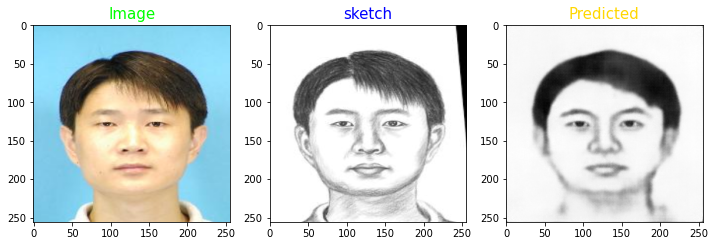

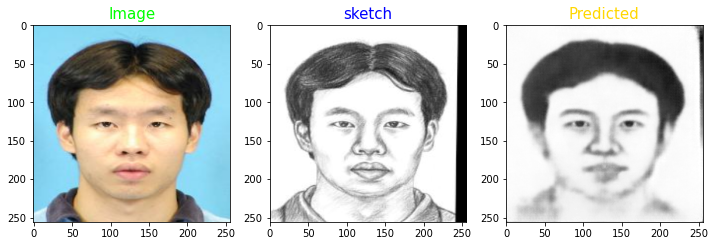

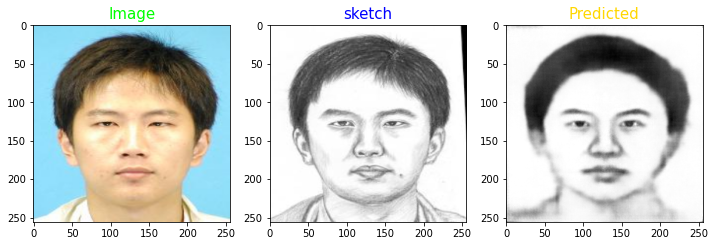

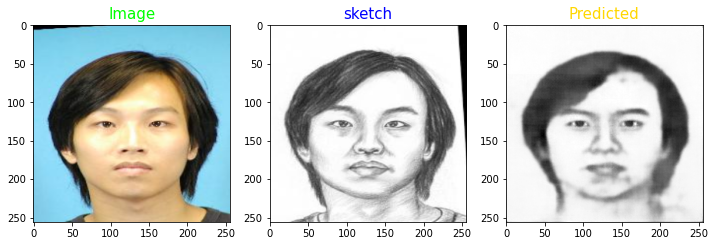

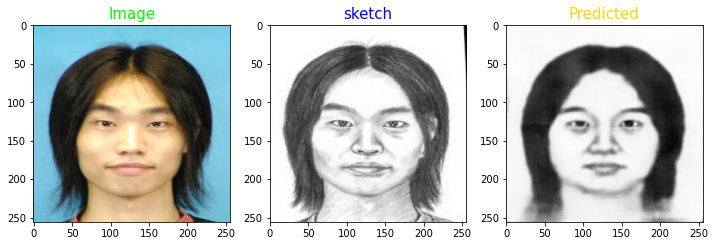

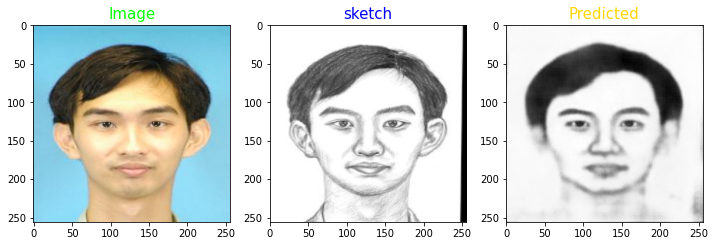

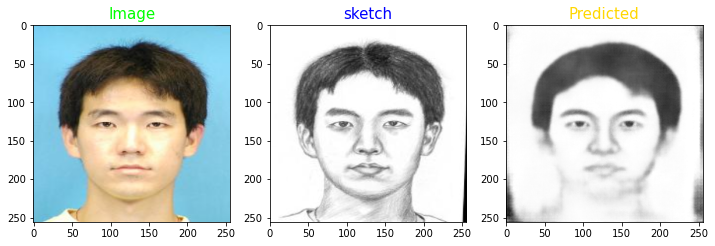

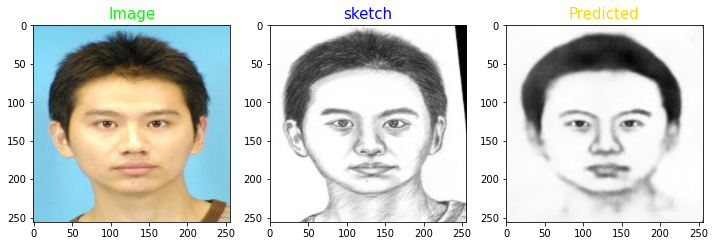

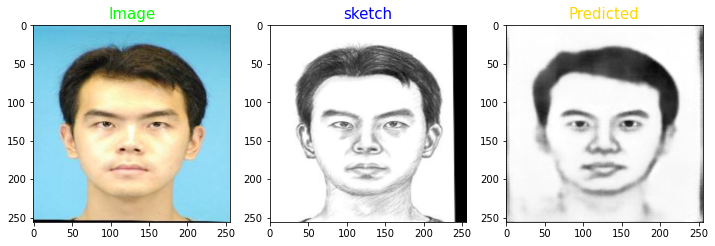

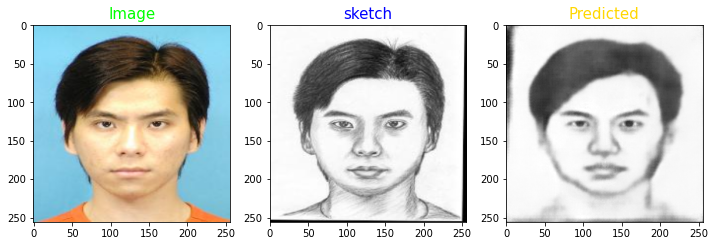

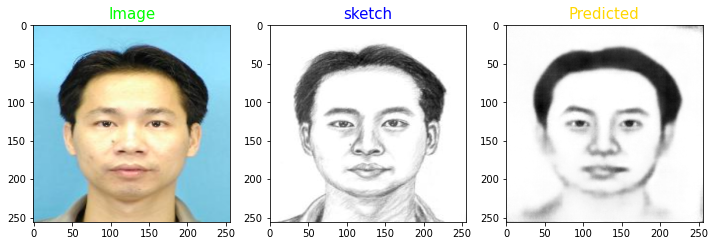

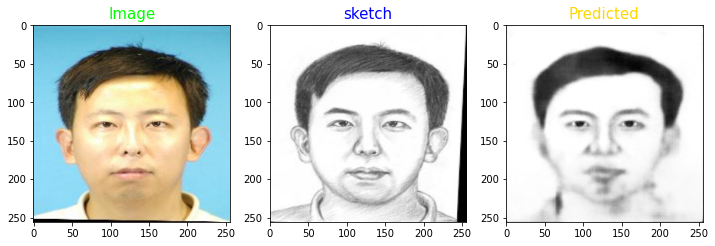

In [113]:
ls = [i for i in range(0,95,8)]
for i in ls:
    predicted =np.clip(model_Kaggle.predict(test_image[i].reshape(1,SIZE,SIZE,3)),0.0,1.0).reshape(SIZE,SIZE,1)
    show_images(test_image[i],test_sketch_image[i].reshape(SIZE,SIZE),predicted.reshape(SIZE,SIZE))